In [1]:
%load_ext autoreload
%autoreload 2

from utils import *
from dual import *



### voice data prep

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


data_voice = pd.read_csv('voice.csv')
data_voice_cut = data_voice.sample(100)

In [8]:
data_size = len(data_voice_cut.index)

voice_X = data_voice_cut.iloc[:, :-1]
voice_y = data_voice_cut.iloc[:, -1]

# code categories to -1/1
gender_encoder = LabelEncoder()
voice_y = np.array(gender_encoder.fit_transform(voice_y))
voice_y = voice_y * 2 - 1

# normalize data
scaler = StandardScaler()
scaler.fit(voice_X)
voice_X = np.array(scaler.transform(voice_X))
voice_X = voice_X[:,0:6]

random = np.array([rd.randint(0, 1) * 2 - 1 for x in range(data_size)])

In [190]:
save_file('histories/voice_tricky_random',random)

In [191]:
data_voice_cut = load_file('histories/voice_tricky')
random = load_file('histories/voice_tricky_random')

In [187]:
random = random * -1

model: [-0.01       -0.4155386  -0.17921647 -0.6128359   0.11645774 -0.89545132
 -0.65644919  1.        ]
correlation with the rademacher vector: 15.168253101283408 0.15168253101283408


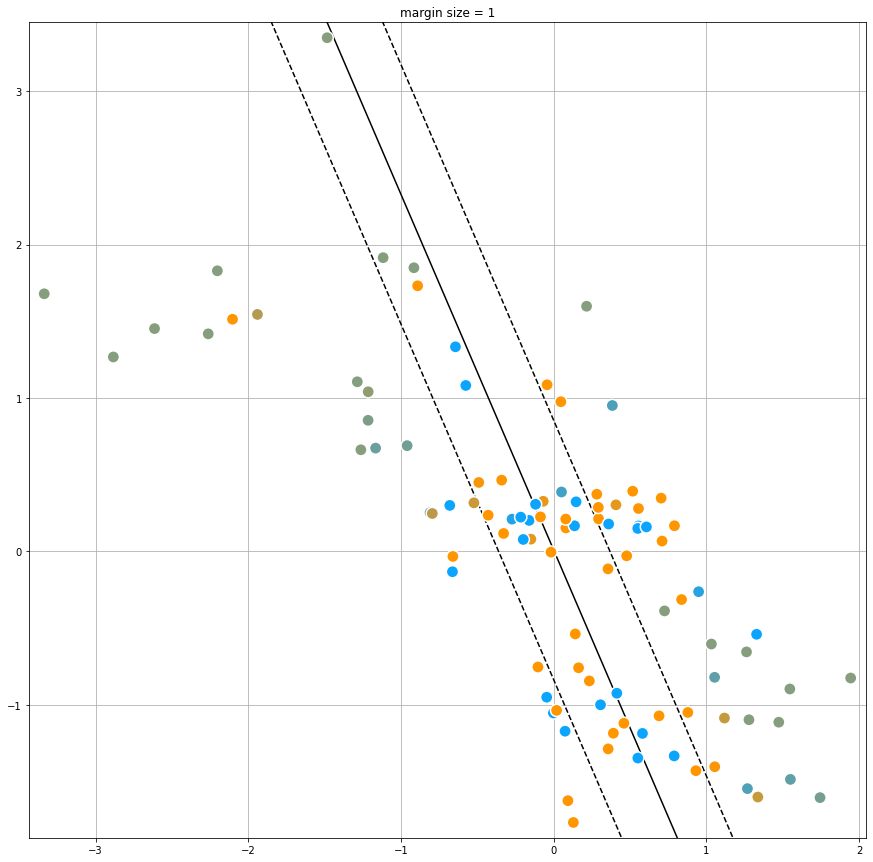

In [9]:
process_dataset(
    X=voice_X, Y=voice_y, radvec=random,
    model_type="margin_loss",
    #method='de', kwargs={'popsize':500},
    method='da', kwargs={'maxiter':1000, 'initial_temp':50000, 'accept':-5},
    margin=1, bounds=0.01,
    figsize=[15,15], dotsize=150, lim_padding=0.1, color_bar=False, verbose=True)

1.0
correlation with the rademacher vector: -3.8720085698171274 -0.019360042849085636


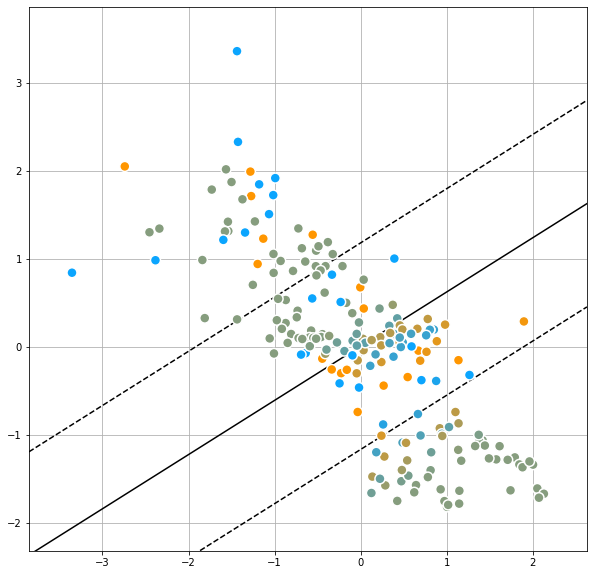

In [205]:
plot_predicts(np.array([0.00999284,-0.00811777,0.0131616,1.]),
              voice_X, voice_y, random,
              model_type="margin_loss", verbose=True)

### testing

In [10]:
BOUND = 5
MARGIN = 0.2

PUMP_X = voice_X
PUMP_Y = voice_y

samples_per_cycle = 10
pump_cycles = 100

rpss=[1,2,3,4,5]
acc=-5
temp=50000
maxiter=1000

In [8]:
rpss

[1, 2, 3, 4, 5]

In [ ]:
for pc in range(pump_cycles):
    for rps in rpss:
        print("\npc",pc,"rps",rps,"acc", acc, "temp", temp,"maxiter",maxiter)

        DATA_SAVE_NAME = 'histories/rpss/rps_' + str(rps)

        try:
            history = load_file(DATA_SAVE_NAME)
        except:
            history = RDhistory('margin_loss')

        for i in range(samples_per_cycle):
            
            radvec = [rd.randint(0, 1) * 2 - 1 for x in range(data_size)]
            
            print(pc * samples_per_cycle + i,end=' ')
            
            samples_accumulated = len(history.hypothesis)

            pump_rademacher(PUMP_X, PUMP_Y,
                            history,
                            radvec=radvec,
                            runs_per_sample=rps,
                            margin=MARGIN,
                            bounds=BOUND,
                            verbose=False,
                            method='da', kwargs={'maxiter':maxiter, 'initial_temp':temp, 'accept':acc})

            # history.complexity.append([samples_accumulated + sample_step, calc_complexity(history)])
            
            save_file(DATA_SAVE_NAME, history)        


pc 0 rps 1 acc -5 temp 50000 maxiter 1000
0 1 2 3 4 5 6 7 8 9 
pc 0 rps 2 acc -5 temp 50000 maxiter 1000
0 1 2 3 4 5 6 7 8 9 
pc 0 rps 3 acc -5 temp 50000 maxiter 1000
0 1 2 3 4 5 6 7 8 9 
pc 0 rps 4 acc -5 temp 50000 maxiter 1000
0 1 2 3 4 5 6 7 8 9 
pc 0 rps 5 acc -5 temp 50000 maxiter 1000
0 1 2 3 4 5 6 7 8 9 
pc 1 rps 1 acc -5 temp 50000 maxiter 1000
10 11 12 13 14 15 16 17 18 19 
pc 1 rps 2 acc -5 temp 50000 maxiter 1000
10 11 12 13 14 15 16 17 18 19 
pc 1 rps 3 acc -5 temp 50000 maxiter 1000
10 11 12 13 14 15 16 17 18 19 
pc 1 rps 4 acc -5 temp 50000 maxiter 1000
10 11 12 13 14 15 16 17 18 19 
pc 1 rps 5 acc -5 temp 50000 maxiter 1000
10 11 12 13 14 15 16 17 18 19 
pc 2 rps 1 acc -5 temp 50000 maxiter 1000
20 21 22 23 24 25 26 27 28 29 
pc 2 rps 2 acc -5 temp 50000 maxiter 1000
20 21 22 23 24 25 26 27 28 29 
pc 2 rps 3 acc -5 temp 50000 maxiter 1000
20 21 22 23 24 25 26 27 28 29 
pc 2 rps 4 acc -5 temp 50000 maxiter 1000
20 21 22 23 24 25 26 27 28 29 
pc 2 rps 5 acc -5 temp 5000

### accepts

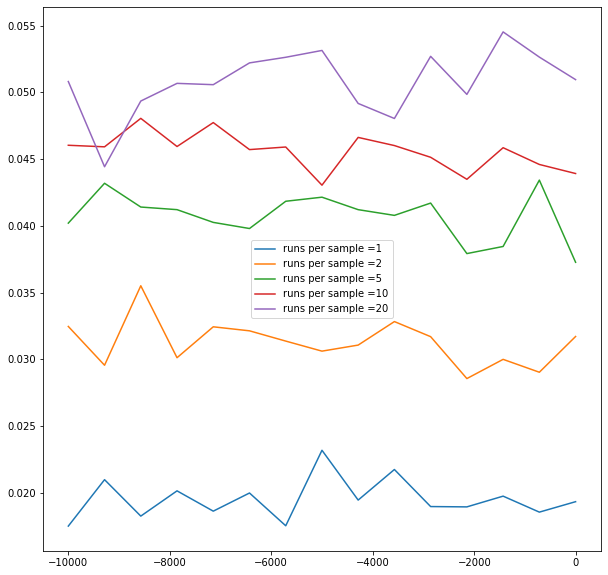

In [37]:
plt.figure(figsize=(10,10))
accepts=np.rint(np.linspace(-1e4,-5,15)).astype(int)
rpss=[1,2,5,10,20]
for rps in rpss:
    comps = []
    for acc in accepts:
        history = load_file('histories/accepts_rps'+str(rps)+'/acc_' + str(acc))
        comps.append(calc_complexity(history))
    plt.plot(accepts, comps, label="runs per sample ="+str(rps))

plt.legend()
plt.show()

### runs per sample

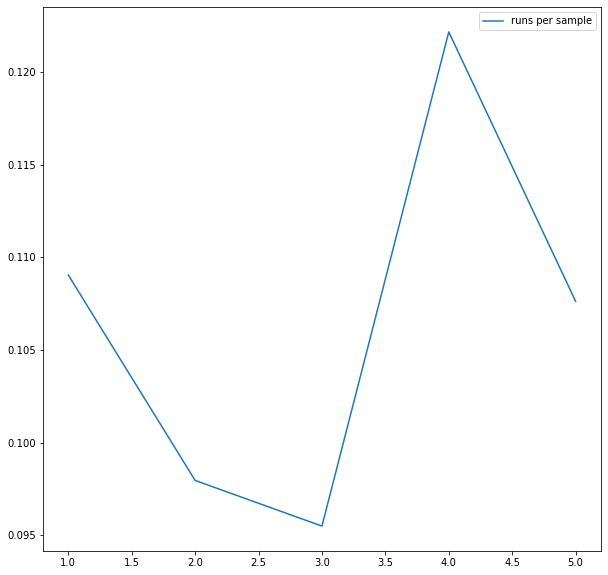

In [6]:
plt.figure(figsize=(10,10))
comps = []

rpss=[1,2,3,4,5]
acc=-5
temp=50000
maxiter=1000

for rps in rpss:
    history = load_file('histories/rpss/rps_'+str(rps))
    comps.append(calc_complexity(history))
plt.plot(rpss, comps, label="runs per sample")


plt.legend()
plt.show()

### temps

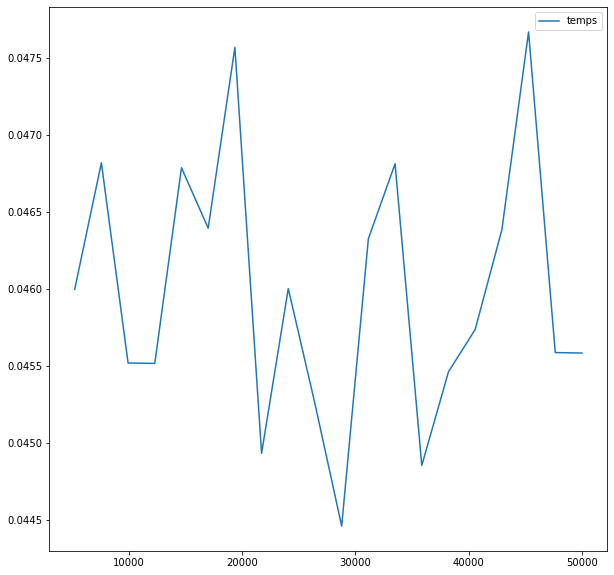

In [56]:
plt.figure(figsize=(10,10))
comps = []

rps=10
acc=-5
temps=np.linspace(5230,50000,20)

for temp in temps:
    history = load_file('histories/temps/temp_'+str(temp))
    comps.append(calc_complexity(history))
plt.plot(temps, comps, label="temps")


plt.legend()
plt.show()

### maxiters

In [12]:
plt.figure(figsize=(10,10))
comps = []

rps=1
acc=-5
temp=50000
maxiters = [1,10,50,100,200,1000,2000]

for maxiter in maxiters:
    history = load_file('histories/maxiter/maxiter_'+str(maxiter))
    print(len(history.rademacher))
    comps.append(calc_complexity(history))
plt.plot(maxiters, comps, label="maxiters")


plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'histories/maxiter/maxiter_1_history.txt'

<Figure size 720x720 with 0 Axes>